## Name: Lorraine Paula Arinaitwe
## Reg. No.: M23B38/004
## Access No.: B20729
## Project Test 1

# SECTION B:
# __Natural Language Processing Project: Text-Based Sentiment Analysis__
## _Step 1: Data Sourcing:_ 
> I decided to target the Education Domain specifically the dataset "Educational_Conversations_with_Sentiment.csv" because I believe it captures daily conversations of students and faculty across multiple scenarios, annotated with sentiment labels. It is also very informative as well as highly organized therefore there will not be much data preprocessing involved.
> I obtained it from Kaggle
### Link: https://www.kaggle.com/datasets/samratabduljalil/educational-conversations-with-sentiment


## _Step 2: Data Loading and preprocessing:_

In [1]:
# Importing necessary libraries for data preprocessing
import pandas as pd #For data manipulation
import seaborn as sns #To enhance the visualizations
import matplotlib.pyplot as plt #For proper visualization via graphs and plots
import numpy as np #for numerical analysis

In [2]:
educ = pd.read_csv("Educational_Conversations_with_Sentiment.csv") #Loading the dataset into a dataframe for proper manipulation
educ

text sentiment
0                     The biryani today was so tasty!  Positive
1                I loved the fresh juice they served.  Positive
2                 The samosas are always my favorite.  Positive
3    The seating area feels really comfortable today.  Positive
4              The ice cream was the perfect dessert.  Positive
..                                                ...       ...
647                 The group project was a disaster.  Negative
648          I got an A in data structures, so happy!  Positive
649              I got the scholarship I applied for!  Positive
650           The new library wing is so comfortable.  Positive
651       The film screening on campus was fantastic.  Positive

[652 rows x 2 columns]

In [3]:
educ.isna().sum().sum() #Checking for missing values

np.int64(0)

In [4]:
educ.duplicated().sum() #Checking for duplicates in the data

np.int64(0)

In [5]:
educ.info() #Checking for general information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       652 non-null    object
 1   sentiment  652 non-null    object
dtypes: object(2)
memory usage: 10.3+ KB


## _There are no missing values or duplicates_

In [6]:
# REMOVING PUNCTUATIONS AND STOP WORDS (very important for modelling)
# Defined a basic list of stopwords

import string
stop_words = set([
    "i","me","my","myself","we","our","ours","ourselves","you","your","yours",
    "yourself","yourselves","he","him","his","himself","she","her","hers","herself",
    "it","its","itself","they","them","their","theirs","themselves","what","which",
    "who","whom","this","that","these","those","am","is","are","was","were","be","been",
    "being","have","has","had","having","do","does","did","doing","a","an","the","and",
    "but","if","or","because","as","until","while","of","at","by","for","with","about",
    "against","between","into","through","during","before","after","above","below","to",
    "from","up","down","in","out","on","off","over","under","again","further","then",
    "once","here","there","when","where","why","how","all","any","both","each","few",
    "more","most","other","some","such","no","nor","not","only","own","same","so",
    "than","too","very","s","t","can","will","just","don","should","now"
])

# Preprocessing function
def preprocess_text(text):
    # Lowercase
    text = str(text).lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Split into words
    words = text.split()
    # Remove stopwords
    words = [w for w in words if w not in stop_words]
    # Join back into string
    return ' '.join(words)

# Apply preprocessing
educ['clean_text'] = educ['text'].apply(preprocess_text)

# Check result
educ[['text','clean_text']].head()

text  \
0                   The biryani today was so tasty!   
1              I loved the fresh juice they served.   
2               The samosas are always my favorite.   
3  The seating area feels really comfortable today.   
4            The ice cream was the perfect dessert.   

                                    clean_text  
0                          biryani today tasty  
1                     loved fresh juice served  
2                      samosas always favorite  
3  seating area feels really comfortable today  
4                    ice cream perfect dessert

In [7]:
educ.tail(20)

text sentiment  \
632        The professor was really harsh today.  Negative   
633       The cafeteria food was terrible today.  Negative   
634   The campus festival was amazing yesterday.  Positive   
635      The lab session was actually fun today.  Positive   
636            I got locked out of my dorm room.  Negative   
637     My notes got lost right before the test.  Negative   
638  When is the registration for next semester?   Neutral   
639      The seminar gave me a lot of new ideas.  Positive   
640    My laptop crashed in the middle of class.  Negative   
641    Do we have to wear formal dress tomorrow?   Neutral   
642     I nailed the internship interview today.  Positive   
643      What’s the deadline for the assignment?   Neutral   
644         The internet in the dorm is so slow.  Negative   
645        I love the new café near the library.  Positive   
646         I totally messed up my presentation.  Negative   
647            The group project was a disaster.  Negative   
648     I got an A in data structures, so happy!  Positive   
649         I got the scholarship I applied for!  Positive   
650      The new library wing is so comfortable.  Positive   
651  The film screening on campus was fantastic.  Positive   

                            clean_text  
632       professor really harsh today  
633      cafeteria food terrible today  
634  campus festival amazing yesterday  
635     lab session actually fun today  
636               got locked dorm room  
637          notes got lost right test  
638         registration next semester  
639         seminar gave lot new ideas  
640        laptop crashed middle class  
641         wear formal dress tomorrow  
642  nailed internship interview today  
643         what’s deadline assignment  
644                 internet dorm slow  
645         love new café near library  
646        totally messed presentation  
647             group project disaster  
648          got data structures happy  
649            got scholarship applied  
650       new library wing comfortable  
651    film screening campus fantastic

## _Step 3: Exploratory Data Analysis (EDA)_

In [8]:
educ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        652 non-null    object
 1   sentiment   652 non-null    object
 2   clean_text  652 non-null    object
dtypes: object(3)
memory usage: 15.4+ KB


C:\Users\deirw\AppData\Local\Temp\ipykernel_28824\786505836.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='sentiment', data=educ, palette=['green','red','blue'])


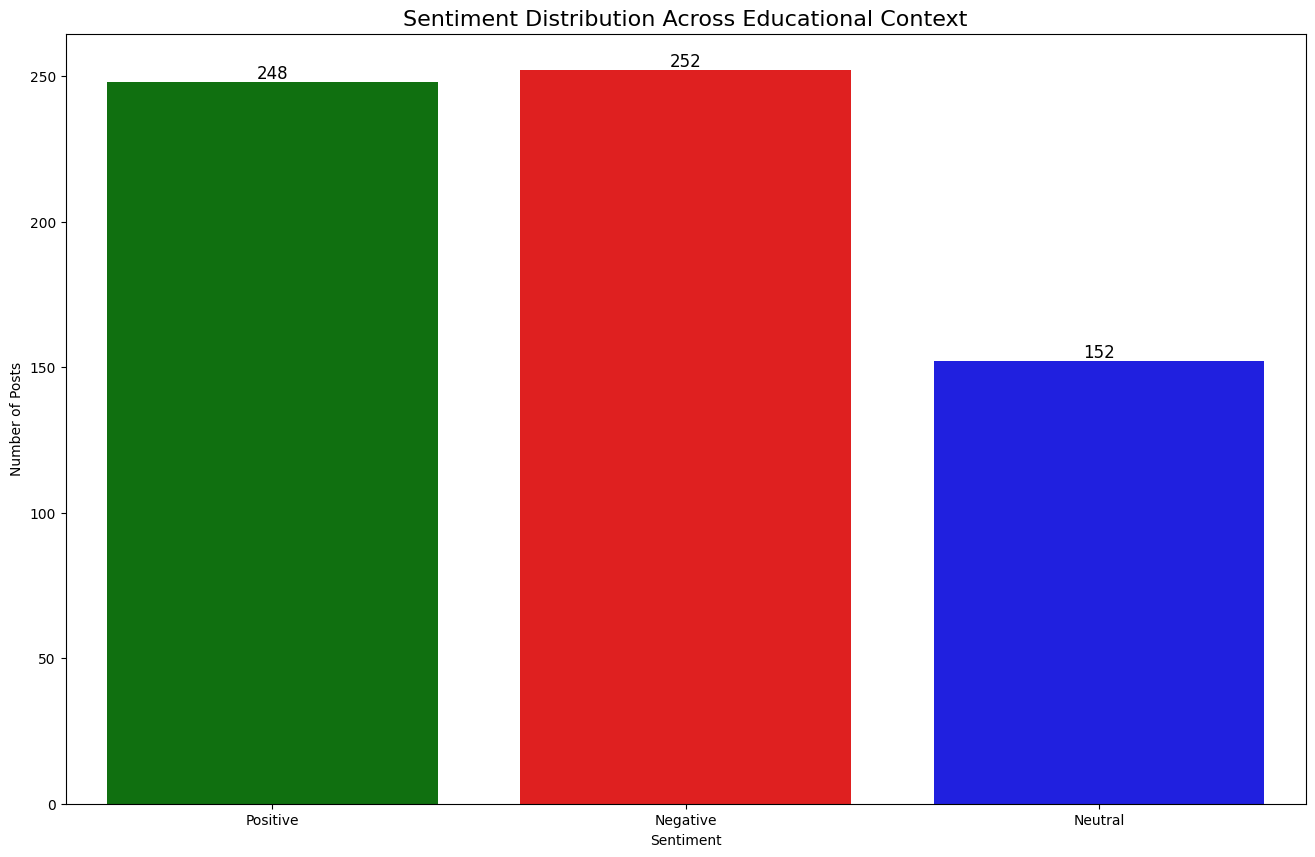

In [9]:
plt.figure(figsize=(16, 10))
ax = sns.countplot(x='sentiment', data=educ, palette=['green','red','blue'])
plt.title("Sentiment Distribution Across Educational Context", fontsize=16)
plt.xlabel("Sentiment")
plt.ylabel("Number of Posts")

# Add counts on top of each bar
for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=12)
plt.show()


In [10]:
# Average text length by sentiment

# Add text length columns
educ['word_count'] = educ['clean_text'].apply(lambda x: len(x.split()))
educ['char_count'] = educ['clean_text'].apply(lambda x: len(x))

# Average word count per sentiment
print("Average Word Count Per Sentiment.\n",educ.groupby('sentiment')['word_count'].mean())

# Average char count per sentiment
print("Average Character Count Per Sentiment.\n",educ.groupby('sentiment')['char_count'].mean())


Average Word Count Per Sentiment.
 sentiment
Negative    3.412698
Neutral     3.000000
Positive    3.858871
Name: word_count, dtype: float64
Average Character Count Per Sentiment.
 sentiment
Negative    23.750000
Neutral     20.493421
Positive    27.125000
Name: char_count, dtype: float64


## Insights From Average Word Count & Character Count Per Sentiment

### 1. Positive comments tend to be longer
- Positive sentiment has the highest average word count (**3.86 words**)  
- And the highest average character count (**27.13 characters**)  

**Interpretation:**  
People expressing positive opinions tend to write slightly longer and more descriptive messages. This suggests that satisfaction or appreciation encourages more detailed responses.

---

### 2. Negative comments are also longer than neutral ones
- Negative comments have **3.41 words** on average  
- And **23.75 characters**, more than neutral comments  

**Interpretation:**  
Negative feedback also tends to be more detailed because users often elaborate on what went wrong or express dissatisfaction.

---

### 3. Neutral comments are the shortest
- Lowest word count (**3.0 words**)  
- Lowest character count (**20.49 characters**)  

**Interpretation:**  
Neutral messages are usually brief and factual, with minimal description or emotional content.

---

### 4. Emotional content (positive or negative) produces longer text
Overall, longer comments tend to carry stronger emotional meaning. Neutral comments are much shorter and less expressive.

**Implication:**  
Text length is a weak but useful indicator of sentiment strength.

---

### 5. Practical benefit for machine learning models
Word count and character count can act as supportive features in sentiment classification.  
- Longer text often provides clearer sentiment cues  
- Shorter text is harder to classify, especially for neutral sentiment  

This explains why sentiment models may perform differently across classes.

---

## _Most common topics per sentiment_

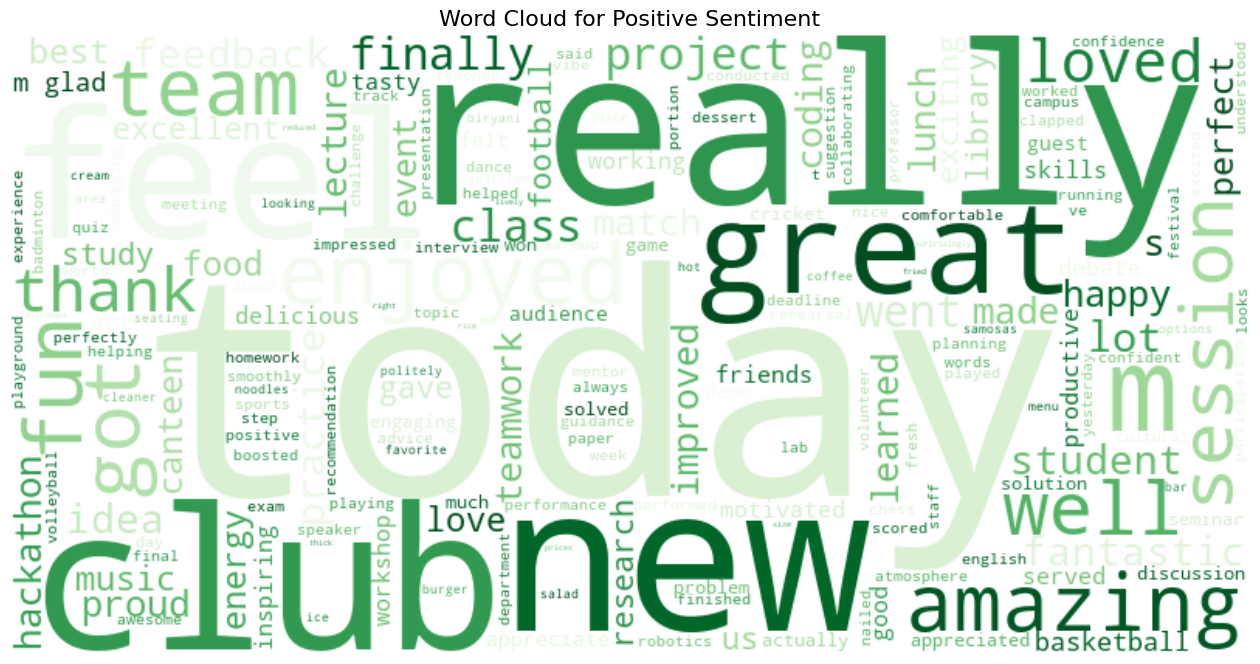

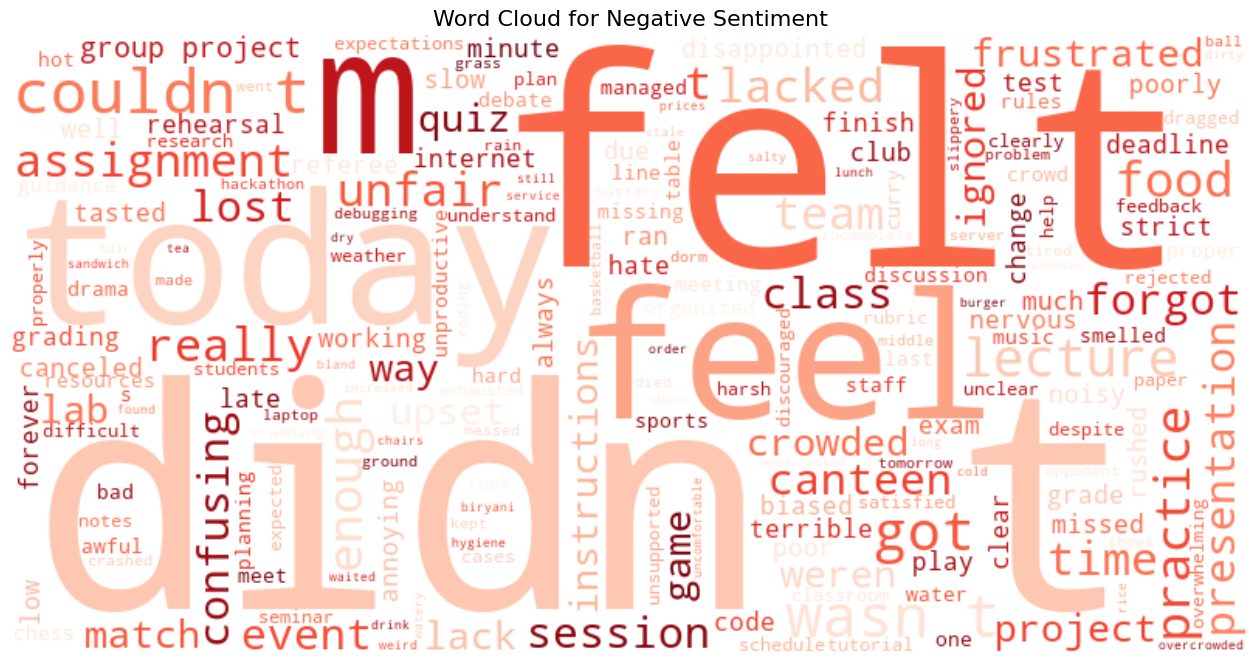

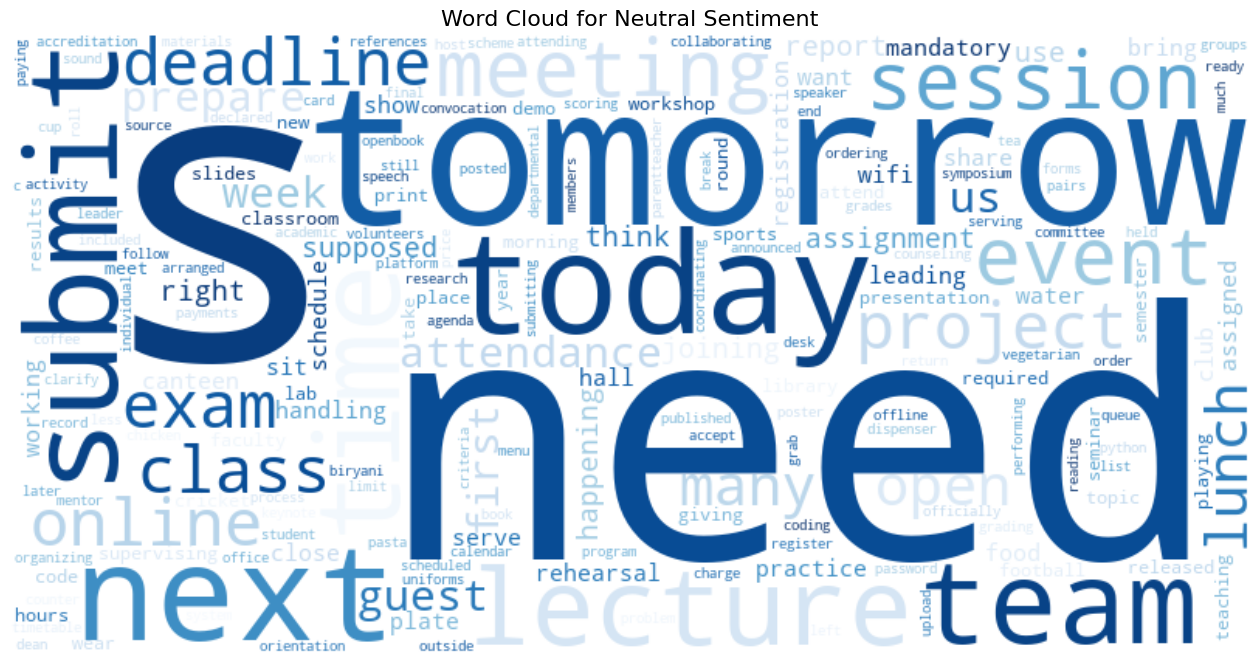

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define custom colors for each sentiment
sentiment_colors = {
    'Positive': 'Greens',
    'Negative': 'Reds',
    'Neutral': 'Blues'
}

# WordClouds
for sentiment in educ['sentiment'].unique():
    text = ' '.join(educ[educ['sentiment'] == sentiment]['clean_text'])
    wordcloud = WordCloud(width=800, height=400, 
                          background_color='white',
                          colormap=sentiment_colors.get(sentiment, 'viridis')).generate(text)
    
    plt.figure(figsize=(16,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {sentiment} Sentiment", fontsize=16)
    plt.show()


## _Step 4: Training using Classification Machine Learning (ML) Models (Sentiment Classification)_

In [17]:
from sklearn.model_selection import train_test_split, GridSearchCV # To split dataset into a ratio of 80:20
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Features and labels
X = educ['clean_text']
y = educ['sentiment']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 2. TF-IDF Vectorizer (with n-grams)
vectorizer = TfidfVectorizer(
    max_features=5000, 
    ngram_range=(1, 2), 
    sublinear_tf=True
)

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [18]:
# 3. Define Models + Hyperparameter Grids
models = {
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=1000, class_weight='balanced'),
        "params": {"C": [0.01, 0.1, 1, 10, 100]}
    },
    "Naive Bayes": {
        "model": MultinomialNB(),
        "params": {"alpha": [0.1, 0.5, 1.0, 2.0]}
    },
    "Random Forest": {
        "model": RandomForestClassifier(class_weight='balanced', random_state=42),
        "params": {
            "n_estimators": [100, 200],
            "max_depth": [10, 20, None],
            "max_features": ["sqrt", "log2"]
        }
    },
    "SVM": {
        "model": SVC(class_weight='balanced'),
        "params": {
            "C": [0.1, 1, 10],
            "kernel": ["linear", "rbf"],
            "gamma": ["scale", "auto"]
        }
    }
}

## _Step 5: Model Evaluation_

In [20]:
# 4. Model Training + Hyperparameter Tuning + Ranking

results = []

for name, cfg in models.items():
    print(f"\n Training {name} ...")

    grid = GridSearchCV(
        cfg["model"],
        cfg["params"],
        cv=3,
        scoring="f1_macro",
        n_jobs=-1
    )

    grid.fit(X_train_vec, y_train)

    best_model = grid.best_estimator_
    predictions = best_model.predict(X_test_vec)

    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average="macro")

    results.append((name, best_model, accuracy, f1))

    print(f"Best Params: {grid.best_params_}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")


 Training Logistic Regression ...
Best Params: {'C': 100}
Accuracy: 0.7405
F1 Score: 0.7365

 Training Naive Bayes ...
Best Params: {'alpha': 0.5}
Accuracy: 0.6870
F1 Score: 0.6717

 Training Random Forest ...
Best Params: {'max_depth': 20, 'max_features': 'log2', 'n_estimators': 200}
Accuracy: 0.6565
F1 Score: 0.6510

 Training SVM ...
Best Params: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 0.7405
F1 Score: 0.7404


In [23]:
# Select Best Model Overall
best_model = sorted(results, key=lambda x: x[3], reverse=True)[0]

print("\n==============================")
print("**BEST PERFORMANCE MODEL**")
print("==============================")
print(f"Model: {best_model[0]}")
print(f"F1 Score: {best_model[3]:.4f}")
print(f"Accuracy: {best_model[2]:.4f}")

final_model = best_model[1]

# 6. Final Classification Report

print("\nDetailed Classification Report:\n")
y_pred_final = final_model.predict(X_test_vec)
print(classification_report(y_test, y_pred_final))



**BEST PERFORMANCE MODEL**
Model: SVM
F1 Score: 0.7404
Accuracy: 0.7405

Detailed Classification Report:

              precision    recall  f1-score   support

    Negative       0.71      0.73      0.72        51
     Neutral       0.83      0.67      0.74        30
    Positive       0.73      0.80      0.76        50

    accuracy                           0.74       131
   macro avg       0.76      0.73      0.74       131
weighted avg       0.75      0.74      0.74       131



### __The analysis derives key insights on NLP's role in preserving low-resource languages like Runyakitara through corpus building and tools, while the sentiment classification on educational data achieves 74% accuracy with SVM, effectively identifying positive/negative/neutral sentiments to support educational improvements.__